In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

path = 'road-game-default-rtdb-export.json'

branchs = ['all-games','complete-games']
childs = ['additional_comments',
         'aggressively_value',
         'behavior',
         'birthYear',
         'computer_value',
         'drivinglicense',
         'education',
         'gender',
         'generously_value',
         'score',
         'steps',
         'win',
         'wisely_value']

# with open(path) as json_file:
#     data = json.load(json_file)
#     num_of_games = len(data[branch])
#     print("number of %s is %d" % (branch, num_of_games))
#     for game_id in data[branch].values():
#         for child in childs:
#             print(child, game_id[child])
#         print()

In [2]:
#load data from the json file
with open(path) as train_file:
    data = json.load(train_file)

In [3]:
df = pd.DataFrame.from_dict(data['complete-games'], orient='index')
df.reset_index(level=0, inplace=True)
df

,index,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-MZ530jslfK_jinP-PMK,"{'blue': 'blueBall move to: a5, action: left',...","{'blue': 'blueBall move to: a4, action: left',...","{'blue': 'blueBall move to: a3, action: left',...","{'blue': 'blueBall move to: b3, action: down',...","{'blue': 'blueBall move to: b3, action: stay',...","{'blue': 'blueBall move to: b3, action: stay',...","{'blue': 'blueBall move to: b3, action: stay',...","{'blue': 'blueBall move to: a3, action: up', '...","{'blue': 'blueBall move to: a2, action: left',...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-MZ5398T_h8JvSPRy_BL,"{'blue': 'blueBall move to: a5, action: left',...","{'blue': 'blueBall move to: a4, action: left',...","{'blue': 'blueBall move to: a4, action: stay',...","{'blue': 'blueBall move to: a3, action: left',...","{'blue': 'blueBall move to: a2, action: left',...","{'blue': 'blueBall move to: a1, action: left',...","{'blue': 'blueBall move to: a1, action: stay',...","{'blue': 'blueBall move to: a1, action: stay',...","{'blue': 'blueBall move to: a1, action: stay',...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-MZ5HzMEI7JJ0lFCjk33,"{'blue': 'blueBall move to: a5, action: left',...","{'blue': 'blueBall move to: a4, action: left',...","{'blue': 'blueBall move to: a3, action: left',...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-MZ5O7368tOtfmjgALD1,"{'blue': 'blueBall move to: a5, action: left',...","{'blue': 'blueBall move to: a4, action: left',...","{'blue': 'blueBall move to: a3, action: left',...","{'blue': 'blueBall move to: b3, action: down',...","{'blue': 'blueBall move to: b3, action: stay',...","{'blue': 'blueBall move to: b3, action: stay',...","{'blue': 'blueBall move to: b3, action: stay',...","{'blue': 'blueBall move to: a3, action: up', '...","{'blue': 'blueBall move to: a2, action: left',...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-MZ9oKz3MZw23gkJJJ3g,"{'blue': 'blueBall move to: a5, action: left',...","{'blue': 'blueBall move to: a4, action: left',...","{'blue': 'blueBall move to: a3, action: left',...","{'blue': 'blueBall move to: a3, action: stay',...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-MZ9oLBNUNJ5PKqjKOmw,"{'blue': 'blueBall move to: a5, action: left',...","{'blue': 'blueBall move to: a4, action: left',...","{'blue': 'blueBall move to: a4, action: stay',...","{'blue': 'blueBall move to: a3, action: left',...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-MZ9oOtrDEqh6eDF9eot,"{'blue': 'blueBall move to: a5, action: left',...","{'blue': 'blueBall move to: a4, action: left',...","{'blue': 'blueBall move to: a3, action: left',...","{'blue': 'blueBall move to: a3, action: stay',...","{'blue': 'blueBall move to: a2, action: left',...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-MZ9oQ7Lwc3R8hv5LYZP,"{'blue': 'blueBall move to: a5, action: left',...","{'blue': 'blueBall move to: a4, action: left',...","{'blue': 'blueBall move to: a4, action: stay',...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-MZ9oREW8hBYnZWsDNbj,"{'blue': 'blueBall move to: a5, action: left',...","{'blue': 'blueBall move to: a4, action: left',...","{'blue': 'blueBall move to: a3, action: left',...","{'blue': 'blueBall move to: a3, action: stay',...","{'blue': 'blueBall move to: a2, action: left',...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-MZ9oWL5GIqSndNfU96s,"{'blue': 'blueBall move to: a5, action: left',...","{'blue': 'blueBall move to: a4, action: left',...","{'blue': 'blueBall move to: a3, action: left',...","{'blue': 'blueBall move to: a2, action: left',...","{'blue': 'blueBall move to: a1, action: left',...","{'blue': 'blueBall move to: a1, action: stay',...","{'blue': 'blueBall move to: a1, action: stay',...","{'blue': 'blueBall move to: a1, action: stay',...","{'blue': 'blueBall move to: a1, action: stay',...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['index', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       'additional_comments', 'aggressively_value', 'behavior', 'birthYear',
       'computer_value', 'drivinglicense', 'education', 'gender',
       'generously_value', 'score', 'steps', 'win', 'wisely_value',
       'press-the-read-instructions-button', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26',
       '27', '28', '29', '30', '31', '32', '33', '34'],
      dtype='object')

## Survay results: 

In [5]:
df['additional_comments']

0                                                      
1                                                      
2                                                      
3                                                      
4                                                      
5                                                      
6                                                      
7                                                      
8                                                      
9                                                      
10                    nocommentsthanksforaskingthough;)
11                                                     
12                                                     
13                                                     
14                                                     
15                                                     
16                                                     
17                                              

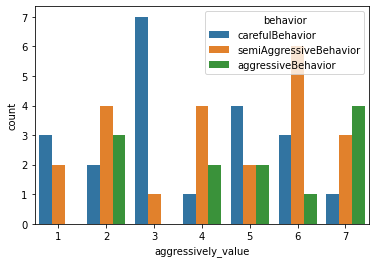

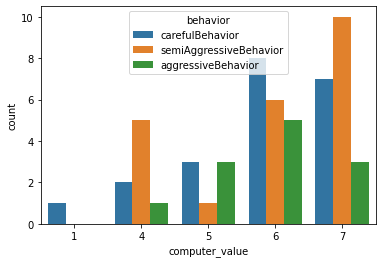

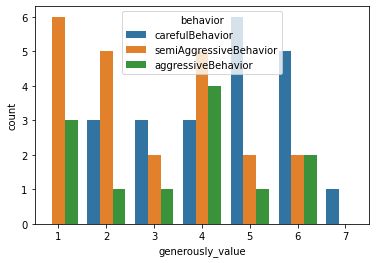

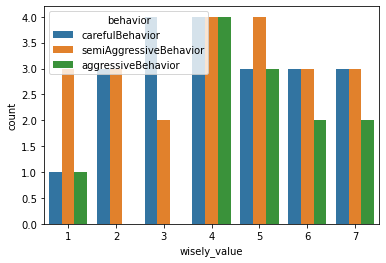

In [6]:
def count_plot_by_behavior(feature):
    sns.countplot(x=df[feature],hue=df['behavior'])
    plt.show()
    
for value in ['aggressively_value', 'computer_value', 'generously_value', 'wisely_value']:
    count_plot_by_behavior(value)

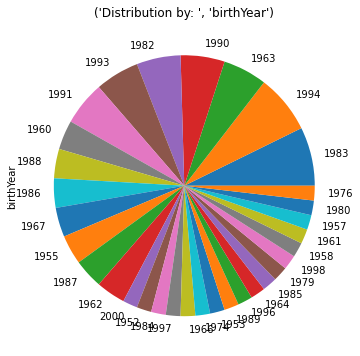

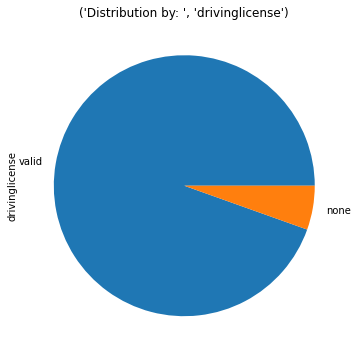

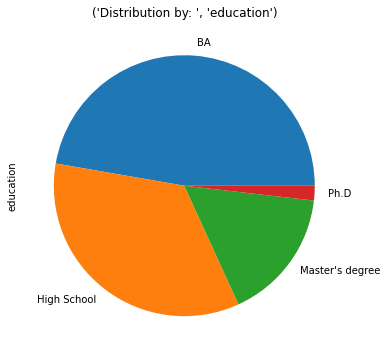

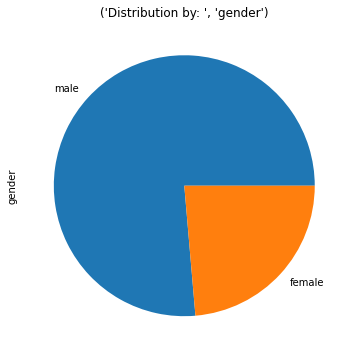

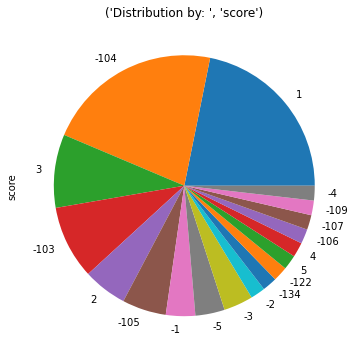

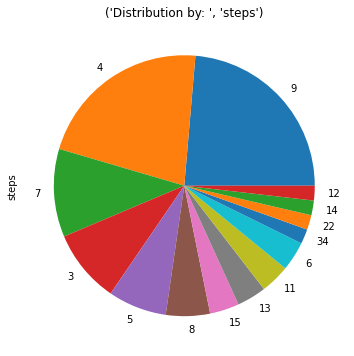

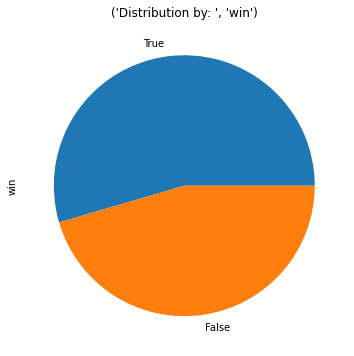

In [7]:
def pie_count_plot(feature):
    list_gen=df[feature].value_counts().plot.pie(figsize=(6, 6))
    title = 'Distribution by: ', feature
    plt.title(title)
    plt.show()
    
for value in ['birthYear', 'drivinglicense', 'education', 'gender', 'score', 'steps', 'win']:
    pie_count_plot(value)

# Statistics of the red agent movements:

In [8]:
red_moves = pd.DataFrame.from_dict(data['statistics'], orient='index')
# red_moves.reset_index(level=0, inplace=True)
red_moves = red_moves.fillna(0)
red_moves

,right,stay,up,down
a1 a2,6.0,1.0,0.0,0.0
a1 a3,11.0,0.0,0.0,0.0
a1 a4,12.0,0.0,0.0,0.0
a1 a5,16.0,0.0,0.0,0.0
a2 a1,1.0,4.0,0.0,2.0
a2 a3,8.0,0.0,0.0,1.0
a2 a4,11.0,0.0,0.0,0.0
a3 a1,2.0,1.0,0.0,3.0
a3 a2,7.0,54.0,0.0,3.0
a3 a5,1.0,0.0,0.0,1.0


## Distribution of red agent movements:

In [9]:
pd.options.display.float_format = "{:,.2f}".format
red_moves.div(red_moves.sum(axis=1), axis=0)

,right,stay,up,down
a1 a2,0.86,0.14,0.00,0.00
a1 a3,1.00,0.00,0.00,0.00
a1 a4,1.00,0.00,0.00,0.00
a1 a5,1.00,0.00,0.00,0.00
a2 a1,0.14,0.57,0.00,0.29
a2 a3,0.89,0.00,0.00,0.11
a2 a4,1.00,0.00,0.00,0.00
a3 a1,0.33,0.17,0.00,0.50
a3 a2,0.11,0.84,0.00,0.05
a3 a5,0.50,0.00,0.00,0.50


In [10]:
pd.crosstab(columns=red_moves.columns, index=red_moves.index, margins=True, normalize='index')

ValueError: arrays must all be same length